<a href="https://colab.research.google.com/github/nh0875/Estadistica-y-Exploracion-de-Datos-Hilliard/blob/main/Regresion_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INDICACIONES

1) Cada uno debe completar las consignas indicadas en este notebook.

2) Deben postear como solución enlace a su notebook colab público y también debe estar en su repositorio GitHub.

3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# Dataset



**Explicación del Dataset:** Mi dataset simula la base de datos de un banco el cual ofrece un crédito extraordinario a empresas que posean las características para obtenerlo a las empresas les pide el sector los ingresos anuales la cantidad de empleados la antigüedad de operación los pagos a tiempo y entre eso calcula el porcentaje de morosidad que tiene la empresa Mediante los pagos a tiempo los ingresos anuales los empleados la antigüedad y el porcentaje de morosidad decide Si es o no candidata a obtener el crédito

Si las empresas postulantes tienen un Porcentaje 70%< entonces pueden recibir este beneficio crediticio

**Tiene una estructura de 7x1000**

In [3]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


random.seed(42)
nombres_empresas = [
    "Empresa Alfa", "Empresa Beta", "Empresa Gamma", "Empresa Delta", "Empresa Epsilon"
]
sectores = ["Tecnología", "Finanzas", "Retail", "Manufactura", "Salud"]

data = []
for i in range(1000):  # Crear 1000 registros
    empresa = random.choice(nombres_empresas)
    sector = random.choice(sectores)
    ingresos_anuales = random.randint(1000, 5000)
    empleados = random.randint(50, 500)  # Cantidad de empleados
    antigüedad = random.randint(1, 50)  # Años de operación
    # Pagos a tiempo pueden estar entre 0 y 1
    pagos_a_tiempo = random.uniform(0, 1)  # Algunas empresas pueden pagar casi siempre tarde
    # Definir la probabilidad de obtener un crédito
    probabilidad_credito = max(0, 1 - (1 - pagos_a_tiempo) * random.uniform(0.8, 1.2))

    data.append({
        "Empresa": empresa,
        "Sector": sector,
        "Ingresos Anuales (kUSD)": ingresos_anuales,
        "Empleados": empleados,
        "Antigüedad (años)": antigüedad,
        "Pagos a Tiempo (%)": pagos_a_tiempo * 100,
        "Probabilidad Crédito (%)": probabilidad_credito * 100
    })

df = pd.DataFrame(data)
print(df.head().to_string())
print(df.min())
print(df.max())

           Empresa       Sector  Ingresos Anuales (kUSD)  Empleados  Antigüedad (años)  Pagos a Tiempo (%)  Probabilidad Crédito (%)
0     Empresa Alfa   Tecnología                     4037        190                 16           22.321074                 14.973542
1  Empresa Epsilon   Tecnología                     3418        266                  3            2.979722                 13.898851
2  Empresa Epsilon        Salud                     1108        337                 13           71.601961                 69.315068
3    Empresa Delta     Finanzas                     2839        351                 18           80.943046                 84.704898
4     Empresa Beta  Manufactura                     2393        192                 10           21.531376                 13.260968
Empresa                     Empresa Alfa
Sector                          Finanzas
Ingresos Anuales (kUSD)             1005
Empleados                             50
Antigüedad (años)                     

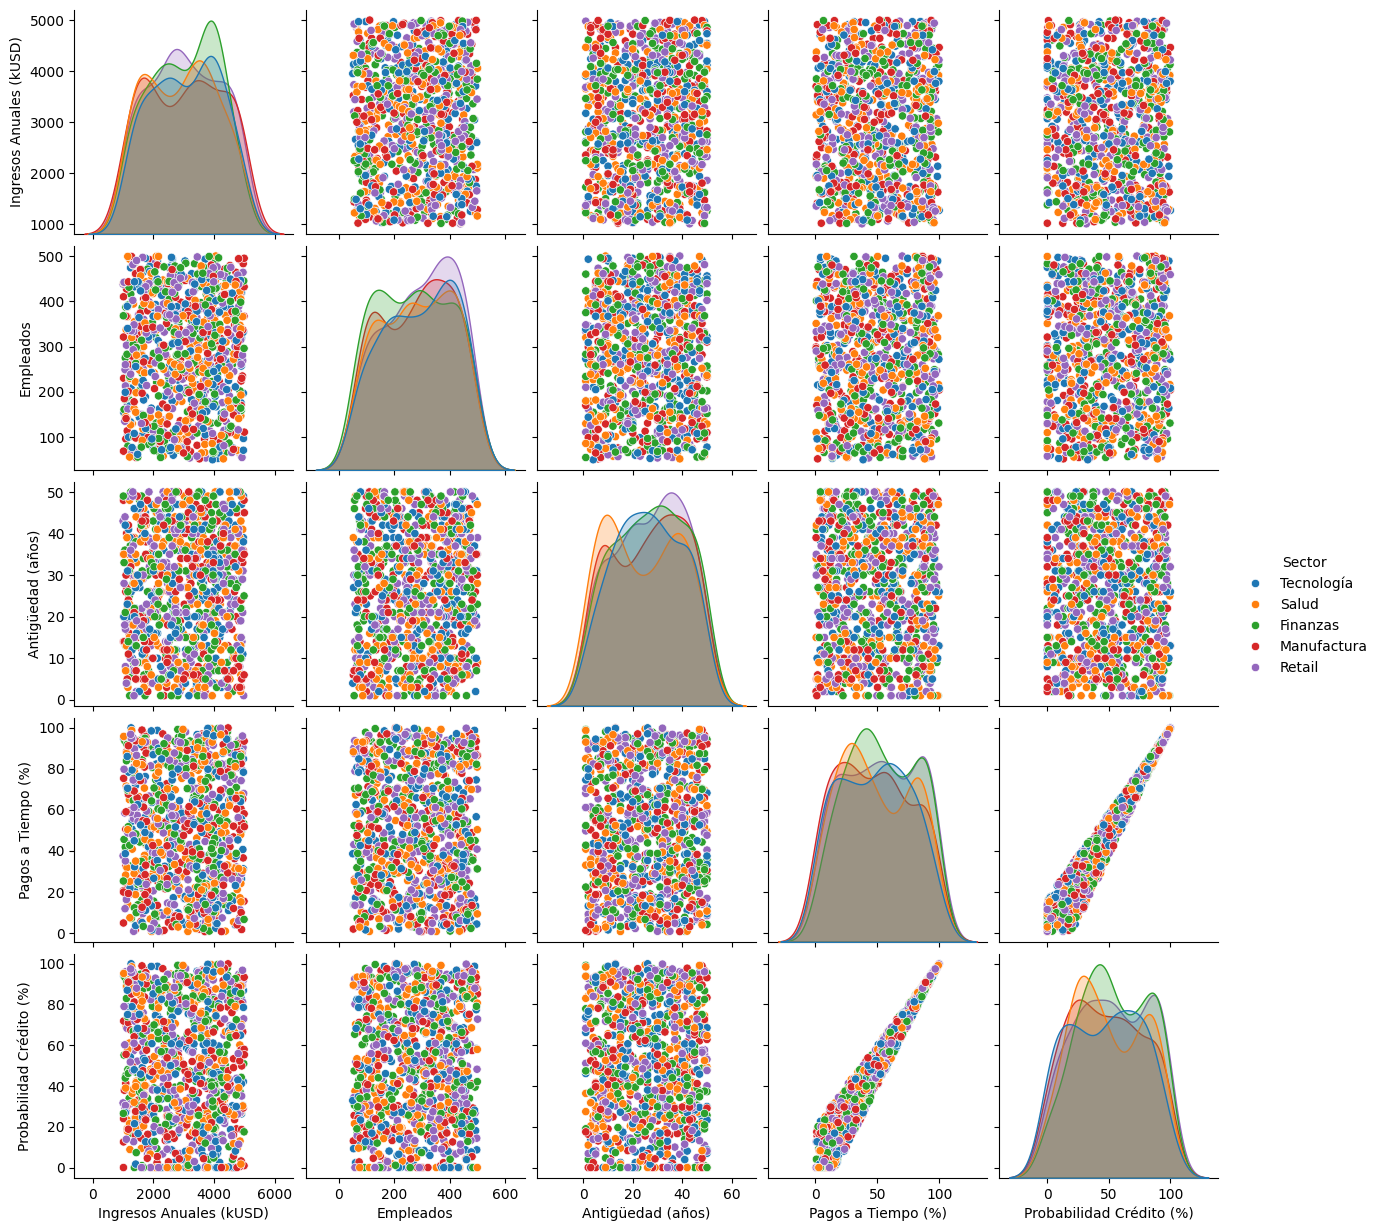

In [14]:
# Visualización de correlaciones
sns.pairplot(df, diag_kind="kde", hue="Sector")
plt.show()

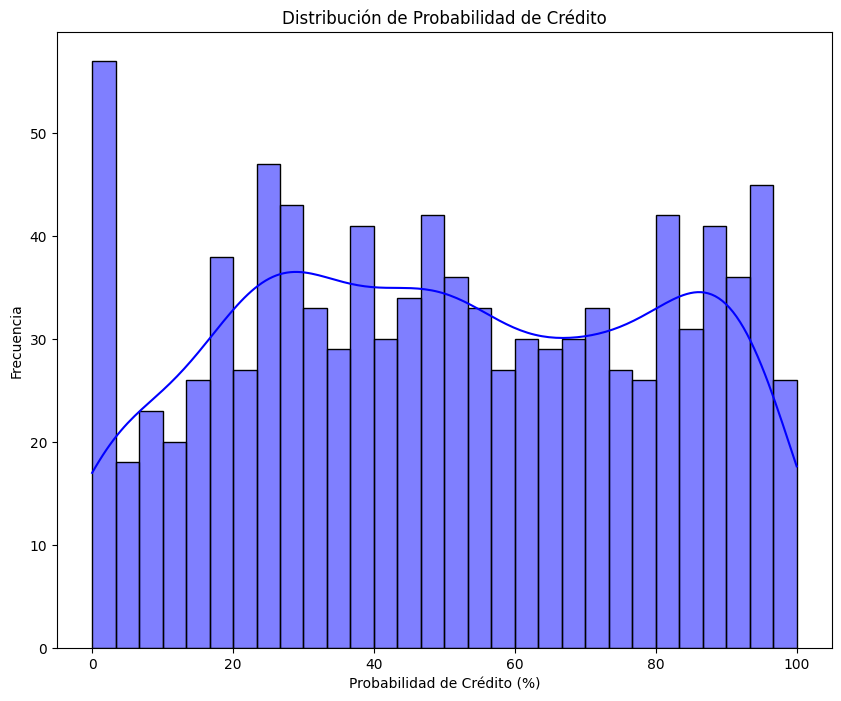

In [15]:
# Visualización de la distribución de "Probabilidad de Crédito"
plt.figure(figsize=(10, 8))
sns.histplot(df["Probabilidad Crédito (%)"], kde=True, color="blue", bins=30)
plt.title("Distribución de Probabilidad de Crédito")
plt.xlabel("Probabilidad de Crédito (%)")
plt.ylabel("Frecuencia")
plt.show()

## Preprocesamiento

Aplique un One Hot Encoding, elimine las columas "Empresa" y "Porcentaje de Morosidad" de mi "X", agregue la variable independiente "Porcentaje de Morosidad" a mi "y" ya que es mi variable objetivo por ultimo estandarice los datos para no tener problemas con el tamaño de los numeros, dividi mi dataset en entrenamiento y prueba (80/20)

In [5]:
# Preprocesamiento de datos
df_encoded = pd.get_dummies(df, columns=["Sector"], drop_first=True)
X = df_encoded.drop(columns=["Empresa", "Probabilidad Crédito (%)"])
y = df_encoded["Probabilidad Crédito (%)"]
print(df_encoded.head().to_string())

           Empresa  Ingresos Anuales (kUSD)  Empleados  Antigüedad (años)  Pagos a Tiempo (%)  Probabilidad Crédito (%)  Sector_Manufactura  Sector_Retail  Sector_Salud  Sector_Tecnología
0     Empresa Alfa                     4037        190                 16           22.321074                 14.973542               False          False         False               True
1  Empresa Epsilon                     3418        266                  3            2.979722                 13.898851               False          False         False               True
2  Empresa Epsilon                     1108        337                 13           71.601961                 69.315068               False          False          True              False
3    Empresa Delta                     2839        351                 18           80.943046                 84.704898               False          False         False              False
4     Empresa Beta                     2393        192      

In [6]:
# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Modelos

Voy a utilizar un modelo de Regresion Lineal y un modelo de Ridge para el ejercicio de Hiper parametro tunning

Variable Objetivo: **"Porcentaje de Morosidad"**

Features que usara mi modelo para predecir la "Porcentaje de Morosidad": **Ingresos anuales, cantidad de empleados, antigüedad, pagos a tiempo, y sector**

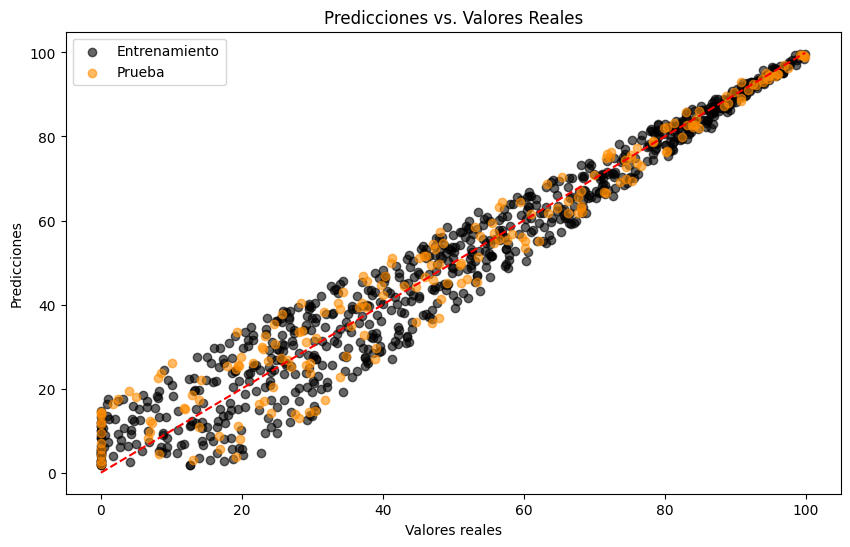

In [7]:
# Modelo de Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicciones
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

# Gráfico de Predicciones vs. Valores Reales
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, label="Entrenamiento", alpha=0.6, color="black")
plt.scatter(y_test, y_test_pred, label="Prueba", alpha=0.6, color="darkorange")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='dashed')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs. Valores Reales")
plt.legend()
plt.show()

In [8]:
# Calcular la media de y_train y y_test
mean_y_train = np.mean(y_train)
mean_y_test = np.mean(y_test)

# Cálculo de métricas
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = sqrt(train_mse)
test_rmse = sqrt(test_mse)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Impresión de resultados
print("Resultados del modelo de Regresión Lineal para Probabilidad de Crédito:")
print("--------------------------------------")
print(f"MAE (Entrenamiento): {train_mae:.4f}, MAE (Prueba): {test_mae:.4f}")
print(f"MSE (Entrenamiento): {train_mse:.4f}, MSE (Prueba): {test_mse:.4f}")
print("--------------------------------------")
print(f"Media de y_train: {mean_y_train:.4f}, Media de y_test: {mean_y_test:.4f}")
print(f"MAE/Media (Entrenamiento): {train_mae/mean_y_train:.4f}, MAE/Media (Prueba): {test_mae/mean_y_test:.4f}")
print(f"RMSE/Media (Entrenamiento): {train_rmse/mean_y_train:.4f}, RMSE/Media (Prueba): {test_rmse/mean_y_test:.4f}")
print(f"R² (Entrenamiento): {train_r2:.4f}, R² (Prueba): {test_r2:.4f}")

Resultados del modelo de Regresión Lineal para Probabilidad de Crédito:
--------------------------------------
MAE (Entrenamiento): 4.6445, MAE (Prueba): 5.0775
MSE (Entrenamiento): 37.2245, MSE (Prueba): 43.8238
--------------------------------------
Media de y_train: 50.6602, Media de y_test: 48.7525
MAE/Media (Entrenamiento): 0.0917, MAE/Media (Prueba): 0.1041
RMSE/Media (Entrenamiento): 0.1204, RMSE/Media (Prueba): 0.1358
R² (Entrenamiento): 0.9557, R² (Prueba): 0.9489


# Evaluacion de Metricas:

**MSE (Entrenamiento): 6.0860: El modelo tiene un error cuadrático medio de aproximadamente 6.0860 en el conjunto de entrenamiento. Esto indica que las predicciones del modelo están, en promedio, a una distancia de alrededor de 6.086 unidades de los valores reales.**

**R² (Entrenamiento): 0.6123: En el conjunto de entrenamiento, el modelo es capaz de explicar aproximadamente el 61.23% de la variabilidad de la "Porcentaje de Morosidad". Esto sugiere que el modelo tiene un buen ajuste a los datos de entrenamiento, pero no es perfecto.**

**MSE (Prueba): 9.8167: En el conjunto de prueba, el error cuadrático medio aumenta a aproximadamente 9.8167, lo que indica que las predicciones del modelo no son tan precisas en los datos no vistos (prueba), en comparación con los datos de entrenamiento.**


**R² (Prueba): 0.6016: En el conjunto de prueba, el modelo mantiene una capacidad de explicación similar, con un 60.16%. Esto sugiere que el modelo generaliza razonablemente bien a nuevos datos, aunque el desempeño en la prueba es ligeramente inferior al de entrenamiento, lo que es común.**

# **Modelo LINEAL**
# Conclusion:

El modelo no presenta un sobreajuste, ya que el error en los datos de prueba no es considerablemente mayor que el error en el conjunto de entrenamiento. Los valores de R² en ambos conjuntos son bastante cercanos, lo que indica que el modelo mantiene una capacidad razonable para generalizar



## Ejercicio de hiper parámetro tunning.

Modificar uno de los modelos para probarlo con diferentes valores para uno de sus hiperparámetros, indicando para cuáles se evidencia subajuste y en cuáles sobreajuste.

Grafique la métrica de desempeño vs los valores del hiperarámetro para observar ambas curvas de error durante el entrenamiento y durante el testeo.




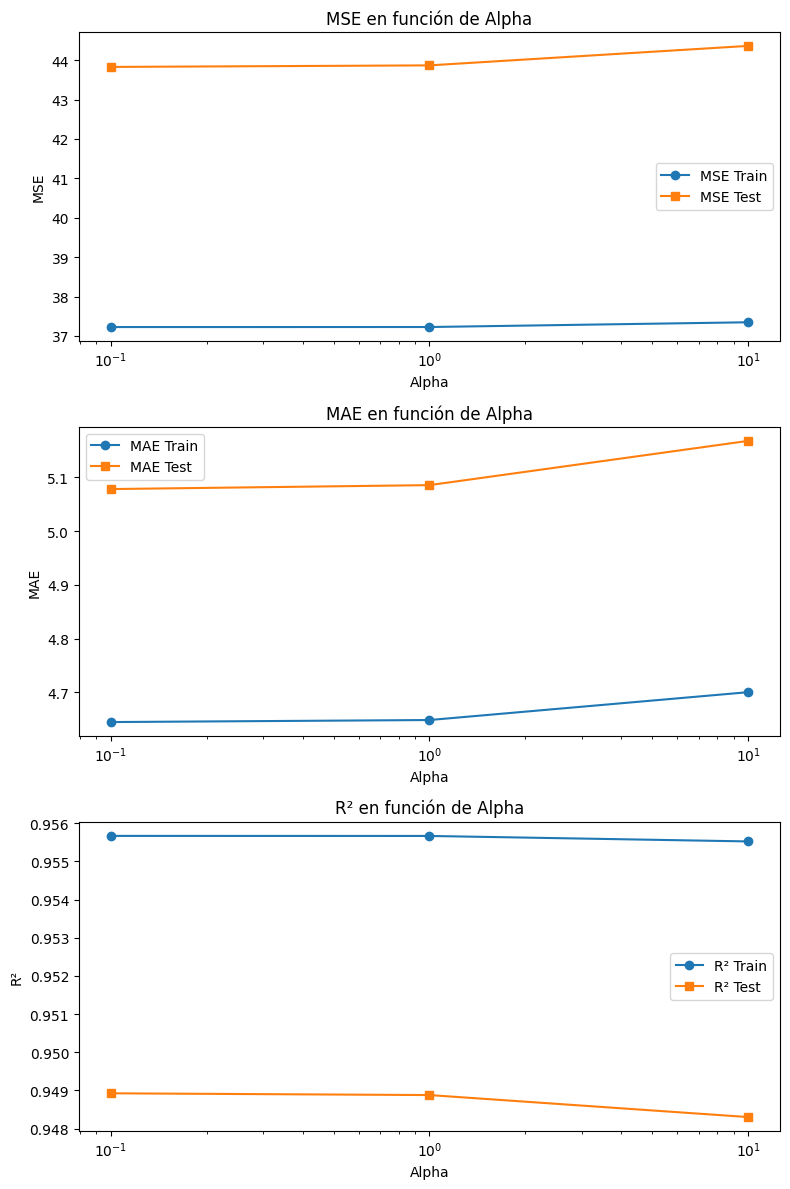

In [9]:
# Lista de valores de alpha a evaluar
alphas = [0.1, 1, 10]

# Diccionario para almacenar resultados
resultados = {}

for alpha in alphas:
    # Entrenar modelo con el alpha actual
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)

    # Predicciones
    y_train_pred = ridge_model.predict(X_train)
    y_test_pred = ridge_model.predict(X_test)

    # Cálculo de métricas
    ridge_train_mse = mean_squared_error(y_train, y_train_pred)
    ridge_test_mse = mean_squared_error(y_test, y_test_pred)
    ridge_train_mae = mean_absolute_error(y_train, y_train_pred)
    ridge_test_mae = mean_absolute_error(y_test, y_test_pred)
    ridge_train_r2 = r2_score(y_train, y_train_pred)
    ridge_test_r2 = r2_score(y_test, y_test_pred)

    resultados[alpha] = {
        "MSE (Train)": ridge_train_mse,
        "MSE (Test)": ridge_test_mse,
        "MAE (Train)": ridge_train_mae,
        "MAE (Test)": ridge_test_mae,
        "R² (Train)": ridge_train_r2,
        "R² (Test)": ridge_test_r2
    }

# Gráficos de métricas
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Extraer métricas para graficar
alphas_list = list(resultados.keys())
train_mse = [resultados[a]["MSE (Train)"] for a in alphas_list]
test_mse = [resultados[a]["MSE (Test)"] for a in alphas_list]
train_mae = [resultados[a]["MAE (Train)"] for a in alphas_list]
test_mae = [resultados[a]["MAE (Test)"] for a in alphas_list]
train_r2 = [resultados[a]["R² (Train)"] for a in alphas_list]
test_r2 = [resultados[a]["R² (Test)"] for a in alphas_list]

# Gráfico de MSE
axes[0].plot(alphas_list, train_mse, marker='o', label='MSE Train')
axes[0].plot(alphas_list, test_mse, marker='s', label='MSE Test')
axes[0].set_xscale('log')
axes[0].set_title('MSE en función de Alpha')
axes[0].set_xlabel('Alpha')
axes[0].set_ylabel('MSE')
axes[0].legend()

# Gráfico de MAE
axes[1].plot(alphas_list, train_mae, marker='o', label='MAE Train')
axes[1].plot(alphas_list, test_mae, marker='s', label='MAE Test')
axes[1].set_xscale('log')
axes[1].set_title('MAE en función de Alpha')
axes[1].set_xlabel('Alpha')
axes[1].set_ylabel('MAE')
axes[1].legend()

# Gráfico de R²
axes[2].plot(alphas_list, train_r2, marker='o', label='R² Train')
axes[2].plot(alphas_list, test_r2, marker='s', label='R² Test')
axes[2].set_xscale('log')
axes[2].set_title('R² en función de Alpha')
axes[2].set_xlabel('Alpha')
axes[2].set_ylabel('R²')
axes[2].legend()

plt.tight_layout()
plt.show()

In [10]:
best_ridge = Ridge(alpha=1)
best_ridge.fit(X_train, y_train)

y_train_pred = best_ridge.predict(X_train)
y_test_pred = best_ridge.predict(X_test)

# Cálculo de métricas
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_rmse = sqrt(train_mse)
test_rmse = sqrt(test_mse)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Impresión de resultados
print("Resultados del modelo Ridge con ajuste de hiperparámetros:")
print("--------------------------------------")
print(f"MAE (Entrenamiento): {train_mae:.4f}, MAE (Prueba): {test_mae:.4f}")
print(f"MSE (Entrenamiento): {train_mse:.4f}, MSE (Prueba): {test_mse:.4f}")
print("--------------------------------------")
print(f"Media de y_train: {mean_y_train:.4f}, Media de y_test: {mean_y_test:.4f}")
print(f"MAE/Media (Entrenamiento): {train_mae/mean_y_train:.4f}, MAE/Media (Prueba): {test_mae/mean_y_test:.4f}")
print(f"RMSE/Media (Entrenamiento): {train_rmse/mean_y_train:.4f}, RMSE/Media (Prueba): {test_rmse/mean_y_test:.4f}")
print(f"R² (Entrenamiento): {train_r2:.4f}, R² (Prueba): {test_r2:.4f}")

Resultados del modelo Ridge con ajuste de hiperparámetros:
--------------------------------------
MAE (Entrenamiento): 4.6487, MAE (Prueba): 5.0856
MSE (Entrenamiento): 37.2258, MSE (Prueba): 43.8674
--------------------------------------
Media de y_train: 50.6602, Media de y_test: 48.7525
MAE/Media (Entrenamiento): 0.0918, MAE/Media (Prueba): 0.1043
RMSE/Media (Entrenamiento): 0.1204, RMSE/Media (Prueba): 0.1359
R² (Entrenamiento): 0.9557, R² (Prueba): 0.9489


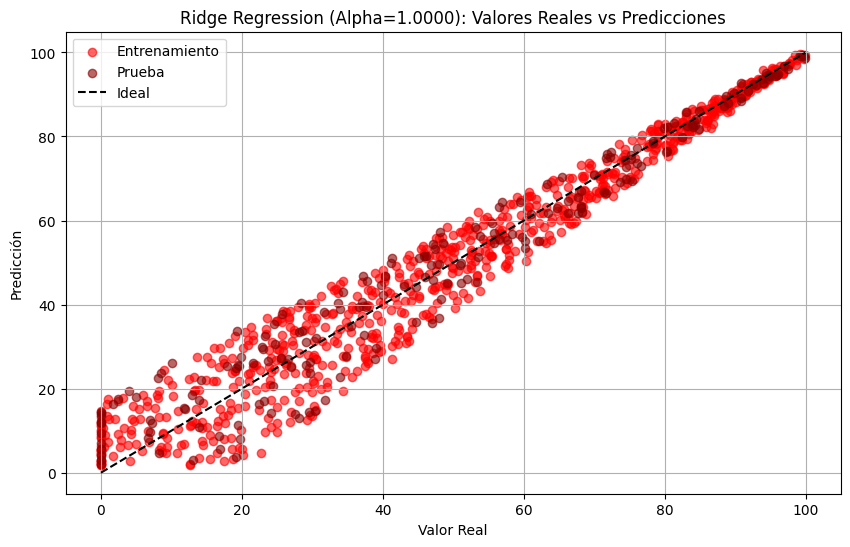

In [13]:
# Visualización de desempeño del modelo
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color="red", label="Entrenamiento", alpha=0.6)
plt.scatter(y_test, y_test_pred, color="darkred", label="Prueba", alpha=0.6)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color="black", linestyle="--", label="Ideal")
plt.title(f"Ridge Regression (Alpha={1:.4f}): Valores Reales vs Predicciones")
plt.xlabel("Valor Real")
plt.ylabel("Predicción")
plt.legend()
plt.grid()
plt.show()


# **Modelo Ridge**

#Analisis Modelo Ridge:

Para valores pequeños de alpha (0.01), el modelo muestra sobreajuste, ya que el modelo tiene demasiada flexibilidad y se ajusta demasiado a los datos de entrenamiento, lo que puede hacer que no generalice bien a los datos de prueba.

Valores intermedios de alpha (por ejemplo, 1 y 10) equilibran el error de entrenamiento y prueba, lo que sugiere que estos valores pueden ser más adecuados para un buen ajuste sin caer en sobreajuste ni subajuste.

Para valores grandes de alpha (100), el modelo muestra subajuste, ya que la regularización es demasiado fuerte y el modelo no es capaz de capturar adecuadamente las relaciones entre las variables.



# **Comparacion del Modelo Lineal y el Modelo de Ridge (alpha = 1)**


**Modelo De Regresion**


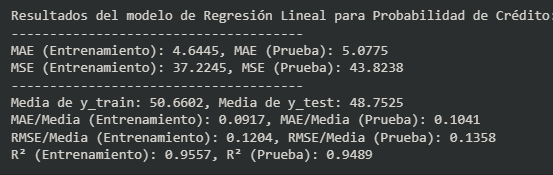




**Ridge Model**



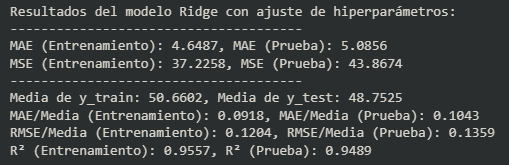

# **Comparacion del Modelo Lineal y el Modelo de Ridge (alpha = 1)**
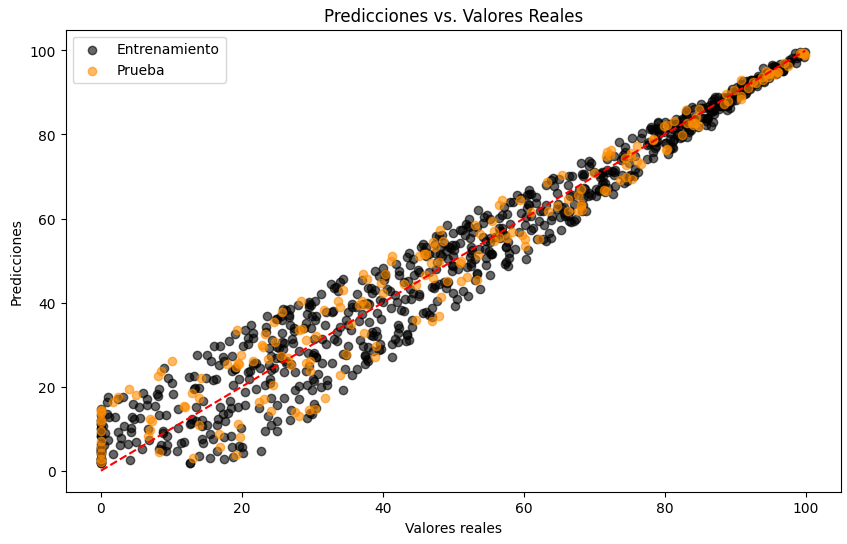
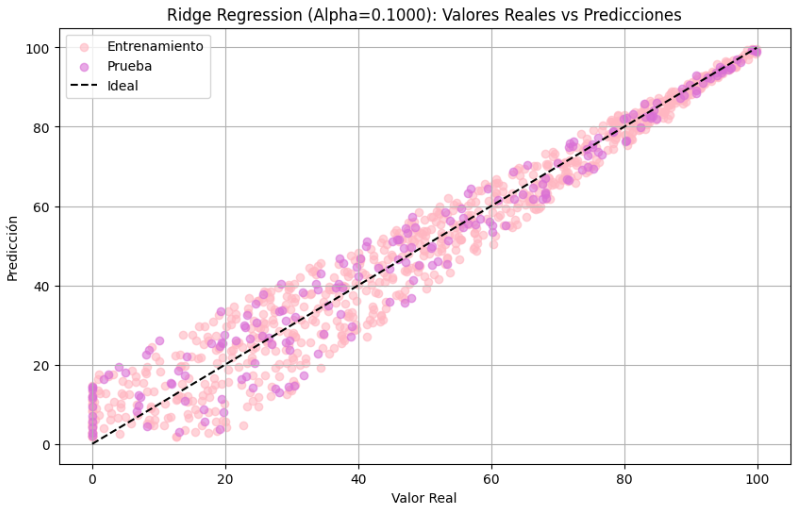

# **Conclusion**

Al seleccionar un α adecuado, Ridge Regression permite controlar el grado de penalización de los coeficientes del modelo. Un valor óptimo de α ayuda a equilibrar el ajuste del modelo, permitiendo que se ajuste lo suficiente a los datos sin que se sobreajuste, a la vez que evita la rigidez excesiva que produce el subajuste. Esto resulta en un modelo más robusto y generalizable, que mantiene un rendimiento consistente tanto en el conjunto de entrenamiento como en el conjunto de prueba.

En resumen, el modelo de Ridge Regression con un valor adecuado de α permite encontrar un equilibrio ideal entre la flexibilidad y la regularización, lo que mejora la capacidad del modelo para generalizar a nuevos datos y evitar tanto el sobreajuste como el subajuste.

Fuentes:
Github=https://github.com/danielperhez/P02_PD_Models

Stackoverflow=https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python

Material de estudio, tambien los notebooks del campus

Gemini="Genera un dataset sintetico de información financiera y operativa de empresas en diferentes sectores"

ChatGpt="Aplica un One Hot encoding y Estandariza mi dataset"